<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/iris_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms



In [22]:
data = load_iris()
X = data.data
Y = data.target
Name = data.target_names

print('X', X.shape)
# print('Y', Y)
# print('Name', Name)

# normalize the X 
ss = StandardScaler()

X = ss.fit_transform(X)
print(X)

train_dataset = X.astype(np.float32)
#train_dataset.dtype = 'float32'
print(train_dataset.shape)

# set data loader
train_loader = torch.utils.data.DataLoader(
      dataset=train_dataset,  # データセットの指定
      batch_size=10,  # ミニバッチの指定
      shuffle=True,  # シャッフルするかどうかの指定
      num_workers=2)  # コアの数

X (150, 4)
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -

In [23]:
# Linear Multi Layer Perceptron Network
class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 2)   
        self.fc2 = nn.Linear(2, 4)
        
    def forward(self, x):
        y = self.fc1(x)
        z = self.fc2(y)
        return z
 

In [24]:
# select device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

net = MLP().to(device)

print(net)

# optimizing
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)


cuda
MLP(
  (fc1): Linear(in_features=4, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=4, bias=True)
)


In [25]:
###  training
print ('training start ...')
num_epochs = 50   
 
# initialize list for plot graph after training
train_loss_list = []

for epoch in range(num_epochs):
    # initialize each epoch
    train_loss = 0
    
    # ======== train_mode ======
    net.train()
    for i, xx in enumerate(train_loader):
#      print('i=',i)
#      print(xx)

      xx=xx.to(device)
      optimizer.zero_grad()
      outputs = net(xx)
      loss = criterion(outputs, xx)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
      avg_train_loss = train_loss / len(train_loader.dataset)
    # print log
    print ('Epoch [{}/{}], Loss: {loss:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss))
    # append list for polt graph after training
    train_loss_list.append(avg_train_loss)


training start ...
Epoch [1/50], Loss: 0.1274
Epoch [2/50], Loss: 0.0964
Epoch [3/50], Loss: 0.0708
Epoch [4/50], Loss: 0.0539
Epoch [5/50], Loss: 0.0425
Epoch [6/50], Loss: 0.0350
Epoch [7/50], Loss: 0.0300
Epoch [8/50], Loss: 0.0265
Epoch [9/50], Loss: 0.0242
Epoch [10/50], Loss: 0.0224
Epoch [11/50], Loss: 0.0210
Epoch [12/50], Loss: 0.0199
Epoch [13/50], Loss: 0.0188
Epoch [14/50], Loss: 0.0179
Epoch [15/50], Loss: 0.0169
Epoch [16/50], Loss: 0.0160
Epoch [17/50], Loss: 0.0152
Epoch [18/50], Loss: 0.0143
Epoch [19/50], Loss: 0.0135
Epoch [20/50], Loss: 0.0127
Epoch [21/50], Loss: 0.0119
Epoch [22/50], Loss: 0.0112
Epoch [23/50], Loss: 0.0105
Epoch [24/50], Loss: 0.0098
Epoch [25/50], Loss: 0.0092
Epoch [26/50], Loss: 0.0086
Epoch [27/50], Loss: 0.0081
Epoch [28/50], Loss: 0.0077
Epoch [29/50], Loss: 0.0072
Epoch [30/50], Loss: 0.0069
Epoch [31/50], Loss: 0.0066
Epoch [32/50], Loss: 0.0063
Epoch [33/50], Loss: 0.0060
Epoch [34/50], Loss: 0.0058
Epoch [35/50], Loss: 0.0056
Epoch [36/

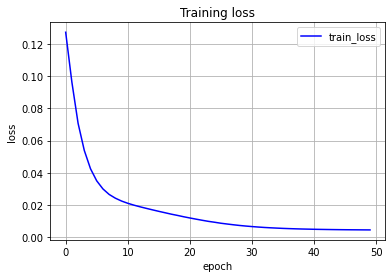

In [26]:
# plot graph
import matplotlib.pyplot as plt
 
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.grid()


pred
[[-1.02736735e+00  1.02787697e+00 -1.30064404e+00 -1.19743943e+00]
 [-1.32940054e+00 -8.22848454e-02 -1.16595376e+00 -1.24306452e+00]
 [-1.37105525e+00  3.39820623e-01 -1.35910296e+00 -1.37418044e+00]
 [-1.42198205e+00  1.01897322e-01 -1.31771779e+00 -1.37086380e+00]
 [-1.03819275e+00  1.23640406e+00 -1.38721728e+00 -1.25296068e+00]
 [-5.84049761e-01  1.91187596e+00 -1.22394514e+00 -9.68701243e-01]
 [-1.28659821e+00  7.60229051e-01 -1.43724620e+00 -1.38528764e+00]
 [-1.09829819e+00  7.95005143e-01 -1.27926147e+00 -1.21419632e+00]
 [-1.62385511e+00 -3.48692030e-01 -1.33496010e+00 -1.46459842e+00]
 [-1.30456579e+00  1.32078335e-01 -1.22233212e+00 -1.26602185e+00]
 [-7.74614215e-01  1.48811316e+00 -1.24080515e+00 -1.05752909e+00]
 [-1.18005431e+00  7.70660341e-01 -1.34445214e+00 -1.28647447e+00]
 [-1.41550422e+00 -9.06905755e-02 -1.24095452e+00 -1.32292604e+00]
 [-1.72991574e+00 -1.23769708e-01 -1.51394498e+00 -1.61402571e+00]
 [-5.10941982e-01  2.19637585e+00 -1.26235664e+00 -9.6108

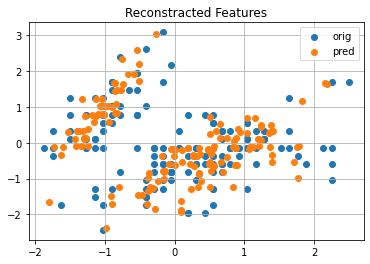

In [27]:
train_batch = torch.from_numpy(train_dataset).to(device)

pred = net(train_batch).to('cpu').detach().numpy().copy()

print('pred')
print(pred)
#print('diff')
#print(train_dataset - pred)

plt.figure()
plt.scatter(train_dataset[:,0], train_dataset[:,1], label='orig')
plt.scatter(pred[:,0], pred[:,1], label='pred')
plt.legend()
plt.title('Reconstracted Features')
plt.grid()

[[ 1.018124   -1.3488052 ]
 [ 1.5775807  -0.3955652 ]
 [ 1.5723808  -0.8332434 ]
 [ 1.6739769  -0.6223146 ]
 [ 1.0026227  -1.5603366 ]
 [ 0.3036998  -2.010343  ]
 [ 1.400195   -1.2086117 ]
 [ 1.1455227  -1.1524918 ]
 [ 2.0061822  -0.27353394]
 [ 1.5139571  -0.59572685]
 [ 0.6170686  -1.6826692 ]
 [ 1.2574202  -1.1677098 ]
 [ 1.6929611  -0.4286443 ]
 [ 2.114619   -0.54707396]
 [ 0.1660224  -2.2566931 ]
 [-0.27300176 -2.9778972 ]
 [ 0.4069103  -2.0688047 ]
 [ 0.9715935  -1.3306429 ]
 [ 0.22803153 -1.7871406 ]
 [ 0.6927369  -1.9058716 ]
 [ 0.81851745 -1.0635943 ]
 [ 0.7305578  -1.6910944 ]
 [ 1.3812333  -1.6784651 ]
 [ 0.96982753 -0.8572424 ]
 [ 1.1800122  -1.1238637 ]
 [ 1.4571254  -0.35141766]
 [ 1.0266591  -1.1015515 ]
 [ 0.92347133 -1.3192732 ]
 [ 1.0336254  -1.1372738 ]
 [ 1.4949728  -0.7893972 ]
 [ 1.5104742  -0.5778658 ]
 [ 0.77706176 -1.0565002 ]
 [ 0.4638937  -2.5171237 ]
 [ 0.15226449 -2.6654418 ]
 [ 1.4674268  -0.5775645 ]
 [ 1.3916333  -0.80310875]
 [ 0.76852655 -1.3037539 ]
 

No handles with labels found to put in legend.


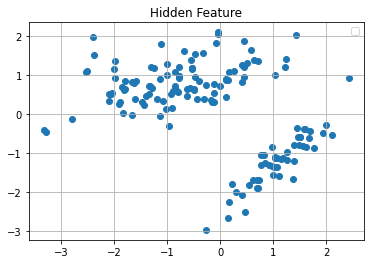

In [28]:

hidden = net.fc1(train_batch).to('cpu').detach().numpy().copy()
print(hidden)

plt.figure()
plt.scatter(hidden[:,0], hidden[:,1])
plt.legend()
plt.title('Hidden Feature')
plt.grid()